<a href="https://colab.research.google.com/github/kumar-someshh/Predict-the-Success-of-Bank-telemarketing/blob/main/21f1001598_notebook_t32024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing data and libraries


In [2]:
# This is a demo submission
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
# test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [4]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

## Exploratory Data Analysis(EDA)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [6]:
train_data.head(20)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no


In [7]:
train_data.describe()


,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# missing values per feature
train_data.isna().sum()

# poutcome has almost 75% missing values, i.e.((2945 x 100)/39211)

,0
last contact date,0
age,0
job,229
marital,0
education,1467
default,0
balance,0
housing,0
loan,0
contact,10336


In [9]:
# check duplicated rows
train_data.duplicated( keep = "first").value_counts()

# No duplicate data

,count
False,39211


In [10]:
train_data.describe(include = "all")

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
count,39211,39211.000000,38982,39211,37744,39211,39211.000000,39211,39211,28875,39211.000000,39211.000000,39211.000000,39211.000000,9760,39211
unique,1013,NaN,11,3,3,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3,2
top,2009-05-15,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,NaN,NaN,failure,no
freq,313,NaN,7776,22691,19584,36954,NaN,21657,31820,25030,NaN,NaN,NaN,NaN,4949,33384
mean,NaN,42.120247,NaN,NaN,NaN,NaN,5441.781719,NaN,NaN,NaN,439.062789,5.108770,72.256051,11.826171,NaN,NaN
std,NaN,12.709352,NaN,NaN,NaN,NaN,16365.292065,NaN,NaN,NaN,769.096291,9.890153,160.942593,44.140259,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,109.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,40.000000,NaN,NaN,NaN,NaN,549.000000,NaN,NaN,NaN,197.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,50.000000,NaN,NaN,NaN,NaN,2030.000000,NaN,NaN,NaN,380.000000,4.000000,-1.000000,0.000000,NaN,NaN


In [11]:
# Calculate the correlation matrix
Numeric_features = train_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = Numeric_features.corr()

corr_matrix


,age,balance,duration,campaign,pdays,previous
age,1.000000,0.289150,0.255573,0.269439,0.199507,0.277487
balance,0.289150,1.000000,0.669737,0.674339,0.562097,0.716816
duration,0.255573,0.669737,1.000000,0.630944,0.527020,0.683951
campaign,0.269439,0.674339,0.630944,1.000000,0.519469,0.689211
pdays,0.199507,0.562097,0.527020,0.519469,1.000000,0.586175
previous,0.277487,0.716816,0.683951,0.689211,0.586175,1.000000


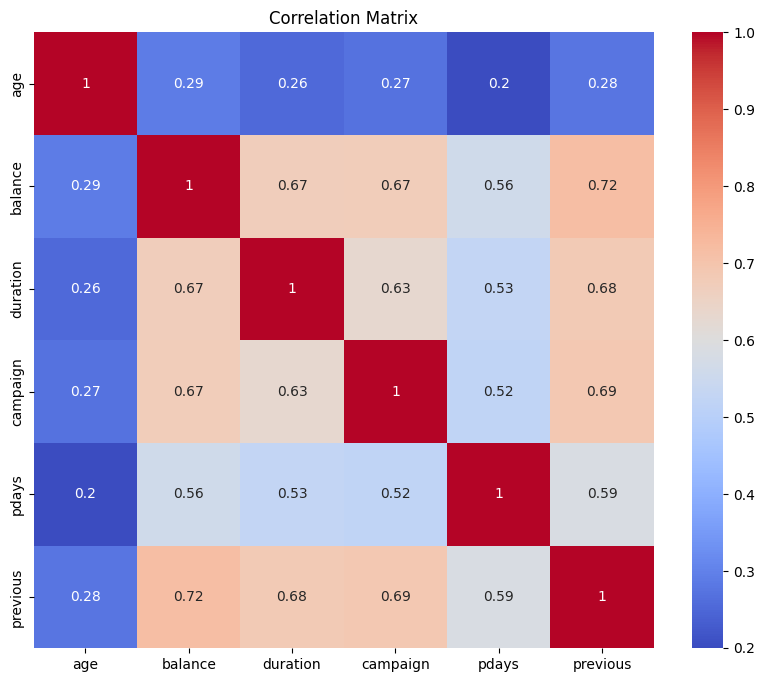

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**`dtypes in our dataset:`**

`DateTime` = [1] last contact date

`Numeric` =  [6] Age, balance, duration, campaign, pday, previous,

`Categorical` = [9] job, marital, education, default, housing, loan, contact, poutcome, target

- Need data encoding accordingly.


In [13]:
# changing dtype of 'last contact data' from object to datetime
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'])

### Numeric Features

In [14]:
# numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
numeric_features = train_data.select_dtypes(include=['int64', 'float64'])
train_data.describe(include = [np.number])

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


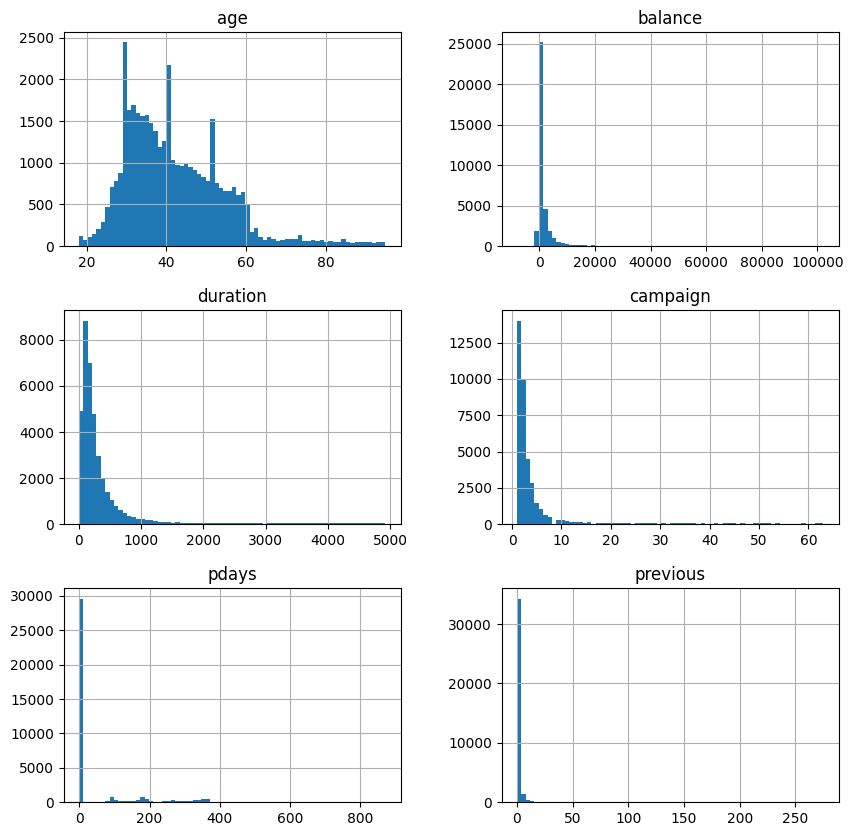

In [15]:
numeric_features.hist(bins=70, figsize=(10, 10))
plt.show()

In [16]:
numeric_features.skew()

,0
age,1.124278
balance,4.063587
duration,3.700585
campaign,3.839593
pdays,2.611773
previous,4.206573


In [17]:
numeric_features.kurtosis()

,0
age,1.760913
balance,16.309795
duration,14.234990
campaign,15.027613
pdays,6.914629
previous,17.281794


### Categorical Features

In [18]:
# Display summary statistics for numeric features
train_data.describe(include=['object'])


,job,marital,education,default,housing,loan,contact,poutcome,target
count,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,11,3,3,2,2,2,2,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,7776,22691,19584,36954,21657,31820,25030,4949,33384


In [19]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']

# Display unique categories for each categorical feature

for feature in categorical_features:
    print(f"{feature}: {train_data[feature].unique()}")

job: ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' nan]
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['cellular' 'telephone' nan]
poutcome: ['other' nan 'failure' 'success']
target: ['no' 'yes']


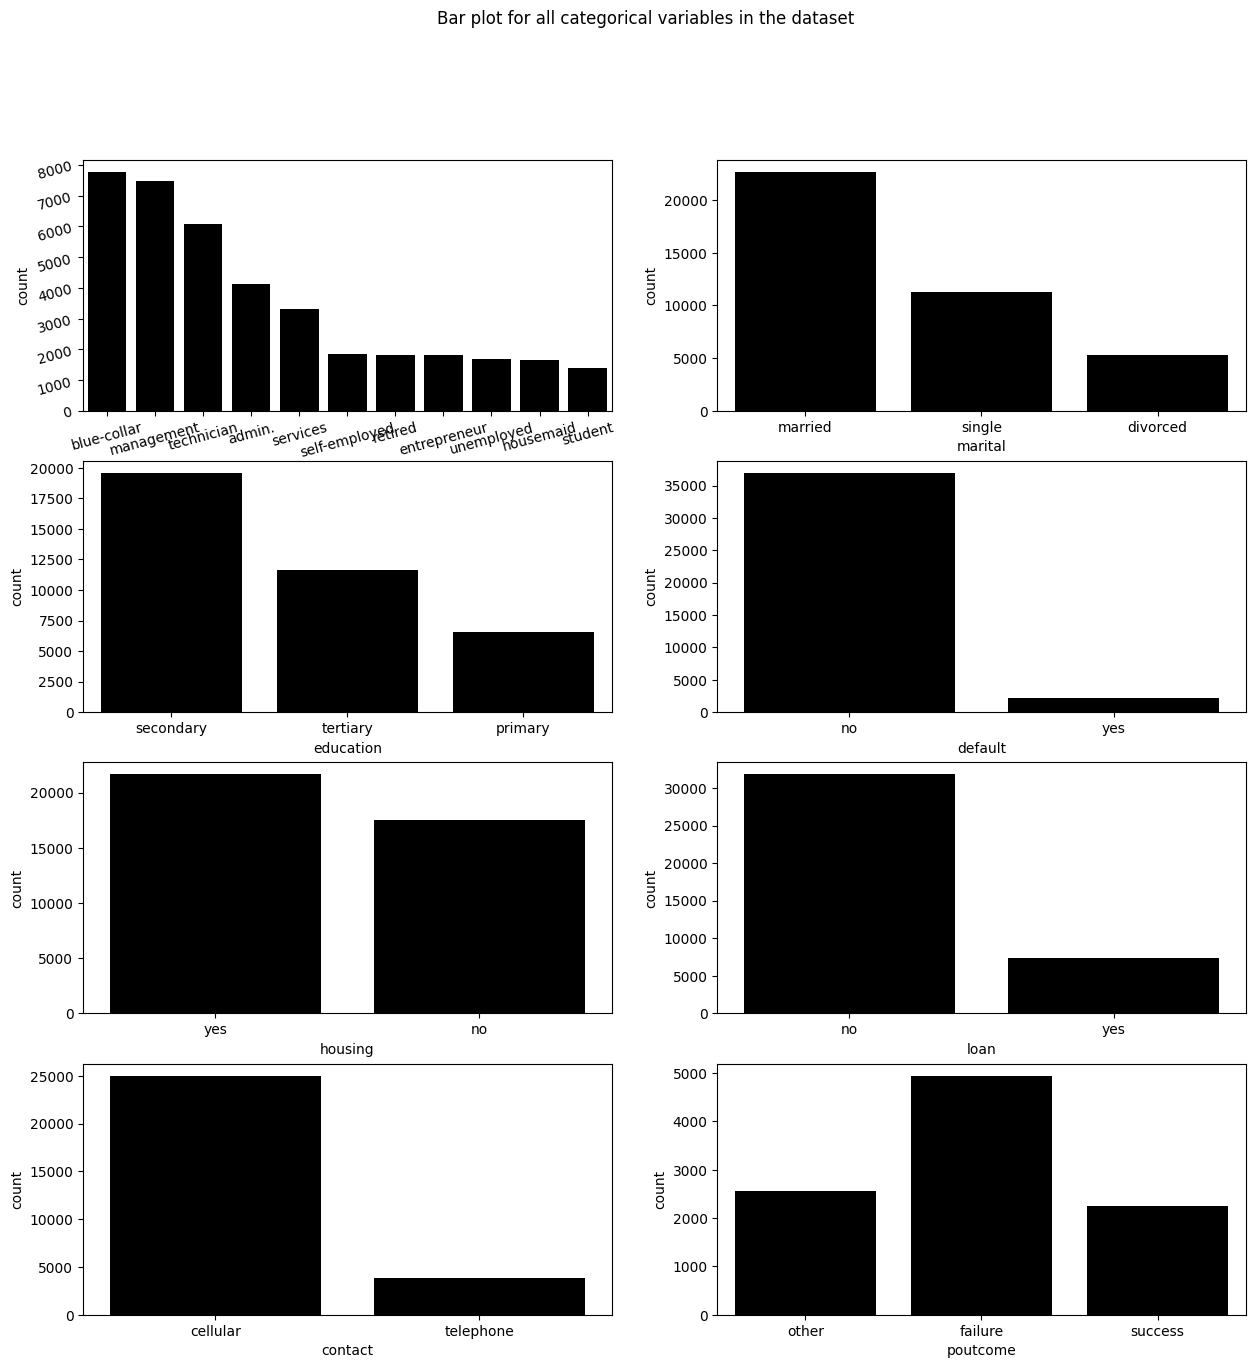

In [20]:
fig, axes = plt.subplots(4, 2, figsize = (15, 15))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'job', data = train_data, color = 'black',
              order = train_data['job'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'marital', data = train_data, color = 'black',
              order = train_data['marital'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'education', data = train_data, color = 'black',
              order = train_data['education'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'default', data = train_data, color = 'black',
              order = train_data['default'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'housing', data = train_data, color = 'black',
              order = train_data['housing'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'loan', data = train_data, color = 'black',
              order = train_data['loan'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'contact', data = train_data, color = 'black',
              order = train_data['contact'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'poutcome', data = train_data, color = 'black',
              order = train_data['poutcome'].head(20).value_counts().index);

axes[0][0].tick_params(labelrotation=15)
# axes[0][1].tick_params(labelrotation=45)
# axes[1][1].tick_params(labelrotation=45);
# axes[2][0].tick_params(labelrotation=90);
# axes[2][1].tick_params(labelrotation=90);

In [21]:
train_data.columns

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

### Key insights from EDA

15 features and 1 target variable with 39211 rows and 3 types of dtype.

**last contact data**
- No null values, DateTime dtype, 3yrs of data in dd-mm-yyy format (2008,2009,2010)
- New features can be extracted from this feature.

**age**
- No null values, Numeric dtype, minimum/maximum = 18/95
- median age = 40,

**job**
- yes null values, categorical dtype, 11 distinct values
- high freq categories blue collar, management, technicion

**marital**
- no null values, categorical dtype, 3 distinct valus in order of freq count (married, single, divorced)

**education**
- yes null values, categorical dtype, 3 distinct values in order of freq count(secondary, tertiary, primary)

**default**
- no null values, categorical dype, 2 distinct values (no, yes)
- high imbalance in data, significant affect on target variable.

**balance**
- no null values, numerical feature, zero,negative value present
- value ranging from -8019 to 102127, with median 549

**housing**
- no null values, 2 distinct values (yes,no)

**loan**
- no null values, categorical feature with two (true,false) category

**contact**
- yes null values, categorical feature (cellular, telephone)

**duratin**
- no null values, numerical feature, min/max = 0/4918 sec, median 197 sec

**campagin**
- no null values, numerical feature, min/max =  1/63, median = 2 times contact

**pday**
- no null values, numerical feature, min/max = -1/871, 75% values are -1 (never contacted before)

**previous**
- no null values, numerical feature, correlation with pdays & default
- min/max = 0/225, 75% zero values

**poutcome**
- yes null values, categorical, 3 categories ( failure, success, other)

**target**
- Yes or NO






## Data preprocessing

In [22]:
# Low-Missing Features (job and education) - filling NA values with most frequent values of the feature(mode)
# High-Missing Feature (contact, poutcome) - creating a separate category


# Imputing null values

from sklearn.impute import SimpleImputer
SI= SimpleImputer(strategy='most_frequent')

train_data[['job', 'education']] = SI.fit_transform(train_data[['job', 'education']])

# Impute 'contact' with a new category 'Unknown'
train_data['contact'].fillna('Unknown', inplace=True)

# Impute 'poutcome' with a new category 'No Outcome'
train_data['poutcome'].fillna('No Outcome', inplace=True)




# applying similar transformation to test featurs

test_data[['job', 'education']] = SI.transform(test_data[['job', 'education']])

test_data['contact'].fillna('Unknown', inplace=True)

test_data['poutcome'].fillna('No Outcome', inplace=True)



<ipython-input-22-d1908b0064af>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['contact'].fillna('Unknown', inplace=True)
<ipython-input-22-d1908b0064af>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [23]:
# Adding more features

# Convert 'last contact date' to datetime if not already
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'])
test_data['last contact date'] = pd.to_datetime(test_data['last contact date'])

# Basic date features
train_data['day'] = train_data['last contact date'].dt.day
train_data['month'] = train_data['last contact date'].dt.month
train_data['year'] = train_data['last contact date'].dt.year
train_data['day of week'] = train_data['last contact date'].dt.dayofweek
train_data['quarter'] = train_data['last contact date'].dt.quarter
train_data['week of year'] = train_data['last contact date'].dt.isocalendar().week
train_data['day of year'] = train_data['last contact date'].dt.dayofyear

test_data['day'] = test_data['last contact date'].dt.day
test_data['month'] = test_data['last contact date'].dt.month
test_data['year'] = test_data['last contact date'].dt.year
test_data['day of week'] = test_data['last contact date'].dt.dayofweek
test_data['quarter'] = test_data['last contact date'].dt.quarter
test_data['week of year'] = test_data['last contact date'].dt.isocalendar().week
test_data['day of year'] = test_data['last contact date'].dt.dayofyear



# Is weekend
train_data['is weekend'] = train_data['last contact date'].dt.dayofweek >= 5
test_data['is weekend'] = test_data['last contact date'].dt.dayofweek >= 5

# Season (assuming Northern Hemisphere)
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'

train_data['season'] = train_data['month'].apply(get_season)
test_data['season'] = test_data['month'].apply(get_season)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform Y
train_data["target"]= label_encoder.fit_transform(train_data["target"])



In [25]:
X  = train_data.drop(columns=['target'])
Y  = train_data['target']


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2,random_state=42,)


In [26]:
# feature encoding


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numerical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create the preprocessing pipelines
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)





# Apply the preprocessing pipeline
x_train = preprocessor.fit_transform(x_train)


x_val = preprocessor.transform(x_val)
test_data  = preprocessor.transform(test_data)



first i will separate features from target feature in training data
like this, X and Y


then i will split the training data  into 80 -20 training and validation set, like this
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

then  i will preprocess the data, preprocess the data, i will learn features form 80% of the data and use that learning to transform 20 % of validation set and test data.


after this, i will test different models on validation set and whichever model performed well on validation set i will pick that model.

after picking i will train that model on entire training data, transform test data with those learning and test picked model on test data.

## Baseline model

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score




# Create and fit the DummyClassifier
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(x_train, y_train)

# Predict and evaluate
predicted_value = baseline_model.predict(x_val)
baseline_accuracy = accuracy_score(y_val, predicted_value)


print(f"Baseline accuracy: {baseline_accuracy:.2f}")


Baseline accuracy: 0.85


## Dimensionality Reduction / Feature Selection

In [30]:
from sklearn.decomposition import PCA

# Initialize PCA, e.g., with 95% explained variance
pca = PCA(n_components=0.95)

# Fit PCA on the preprocessed training data and transform all sets
x_train = pca.fit_transform(x_train)

x_val = pca.transform(x_val)
test_data = pca.transform(test_data)


## Model Training, testing on validation set
Training the Model on different Model, testing it on validation set, selecting the best perfoming model

In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define the models to test
# models = {
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'SVC': SVC(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'BaggingClassifier': BaggingClassifier()
# }

# # Dictionary to store model performance on validation set
# model_scores = {}

# # Train and evaluate models
# for model_name, model in models.items():
#     # Train model
#     model.fit(x_train, y_train)

#     # Predict on validation set
#     y_val_pred = model.predict(x_val)

#     # Calculate accuracy or any other metric you choose
#     accuracy = accuracy_score(y_val, y_val_pred)

#     # Store performance
#     model_scores[model_name] = accuracy

# # Print performance of each model
# for model_name, accuracy in model_scores.items():
#     print(f"{model_name} Accuracy: {accuracy:.4f}")

# # -------------------------------------------------------------------------------
# # KNeighborsClassifier Accuracy: 0.8546
# # DecisionTreeClassifier Accuracy: 0.8242
# # RandomForestClassifier Accuracy: 0.8614
# # GradientBoostingClassifier Accuracy: 0.8592
# # SVC Accuracy: 0.8576
# # AdaBoostClassifier Accuracy: 0.8527
# # BaggingClassifier Accuracy: 0.8559


In [32]:
#  train the model on xgboostClassifier
# no cause we can achieve till 0.75 without any problem just use scale_pos_weight = (len(y_train[y_train==0])/len(y_train[y_train==1])) in XGBClassifier


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])), use_label_encoder=False, eval_metric='logloss', random_state=42)


# Train the model
xgb_model.fit(x_train, y_train)

# Predict on validation set
y_val_pred = xgb_model.predict(x_val)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_val, y_val_pred)

print(f"XGBClassifier Accuracy: {xgb_accuracy:.4f}")




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Accuracy: 0.8284


## Hyperparameter Tuning on Best Model

In [33]:
# # HPT on RandomForestClassifier

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Initialize the RandomForest model
# model = RandomForestClassifier(random_state=42)

# # Perform GridSearchCV to tune hyperparameters
# grid_search = GridSearchCV(estimator=model,
#                            param_grid=param_grid,
#                            cv=5,  # Cross-validation
#                            scoring='accuracy',  # Metric to optimize
#                            n_jobs=-1,  # Use all cores for parallel processing
#                            verbose=2)

# # Fit the grid search
# grid_search.fit(x_train, y_train)

# # Get the best parameters from Grid Search
# print(f"Best Parameters: {grid_search.best_params_}")

# # Get the best model with optimal hyperparameters
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the validation set
# y_val_pred = best_model.predict(x_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy after Hyperparameter Tuning: {accuracy:.4f}")


# ---------------------------------------------------------------------------
# Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# Validation Accuracy after Hyperparameter Tuning: 0.8599


## Retraining best model on entire training *data*

In [36]:
# Train the best model on the entire training dataset


# best_model = RandomForestClassifier(
#     max_depth=10,
#     min_samples_leaf=2,
#     min_samples_split=2,
#     n_estimators=200
# )


best_model = xgb_model

# Retrain on Full Training Data and Test
# Combine x_train and x_val for final training

x_full_train = np.vstack([x_train, x_val])
y_full_train = np.concatenate([y_train, y_val])
best_model.fit(x_full_train, y_full_train)





/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:03:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Testing on the test data

In [37]:

# Predict the test data values
test_pred = best_model.predict(test_data)

test_prediction = label_encoder.inverse_transform(test_pred)

In [38]:
test_prediction

array(['no', 'no', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [39]:
submission = pd.DataFrame({"id": np.arange(0,10000),
                           "target": test_prediction,
                          }
                         )

submission.to_csv('submission.csv',index=False)

In [40]:
pd.read_csv("submission.csv")


,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes
...,...,...
9995,9995,yes
9996,9996,yes
9997,9997,yes
9998,9998,yes
